In [22]:
options(repr.plot.width=3, repr.plot.height=3)

In [37]:
library(jsonlite)
metadata_api_url <- "https://www.googleapis.com/analytics/v3/metadata/ga/columns?pp=1"
metadata_api_response <- fromJSON(metadata_api_url, flatten = T)

df <- as.data.frame(metadata_api_response$items)

vars <- c("attributes.type", "attributes.group", "attributes.status", "attributes.allowedInSegments", "attributes.addedInApiVersion")

df[vars] <- lapply(df[vars], as.factor)
str(df)

'data.frame':	549 obs. of  16 variables:
 $ id                                : chr  "ga:userType" "ga:visitorType" "ga:sessionCount" "ga:visitCount" ...
 $ kind                              : chr  "analytics#column" "analytics#column" "analytics#column" "analytics#column" ...
 $ attributes.type                   : Factor w/ 2 levels "DIMENSION","METRIC": 1 1 1 1 1 1 1 2 2 2 ...
 $ attributes.dataType               : chr  "STRING" "STRING" "STRING" "STRING" ...
 $ attributes.group                  : Factor w/ 33 levels "Ad Exchange",..: 32 32 32 32 32 32 32 32 32 32 ...
 $ attributes.status                 : Factor w/ 2 levels "DEPRECATED","PUBLIC": 2 1 2 1 2 1 2 2 1 2 ...
 $ attributes.uiName                 : chr  "User Type" "User Type" "Count of Sessions" "Count of Sessions" ...
 $ attributes.description            : chr  "A boolean, either New Visitor or Returning Visitor, indicating if the users are new or returning." "A boolean, either New Visitor or Returning Visitor, indicatin

In [42]:
levels(df$attributes.group)

[1] "Ad Exchange"                         "Adsense"                            
 [3] "Adwords"                             "App Tracking"                       
 [5] "Audience"                            "Channel Grouping"                   
 [7] "Content Experiments"                 "Content Grouping"                   
 [9] "Custom Variables or Columns"         "DoubleClick Bid Manager"            
[11] "DoubleClick Campaign Manager"        "DoubleClick for Publishers"         
[13] "DoubleClick for Publishers Backfill" "DoubleClick Search"                 
[15] "Ecommerce"                           "Event Tracking"                     
[17] "Exceptions"                          "Geo Network"                        
[19] "Goal Conversions"                    "Internal Search"                    
[21] "Lifetime Value and Cohorts"          "Page Tracking"                      
[23] "Platform or Device"                  "Related Products"                   
[25] "Session"                             "Site Speed"                         
[27] "Social Activities"                   "Social Interactions"                
[29] "System"                              "Time"                               
[31] "Traffic Sources"                     "User"                               
[33] "User Timings"

In [38]:
# Here I only keep relevant variables provided by the metadata api.
vars <- c("id", "attributes.uiName", vars)
df <- df[vars]
head(df,5)

id,attributes.uiName,attributes.type,attributes.group,attributes.status,attributes.allowedInSegments,attributes.addedInApiVersion
ga:userType,User Type,DIMENSION,User,PUBLIC,true,3
ga:visitorType,User Type,DIMENSION,User,DEPRECATED,true,3
ga:sessionCount,Count of Sessions,DIMENSION,User,PUBLIC,true,3
ga:visitCount,Count of Sessions,DIMENSION,User,DEPRECATED,true,3
ga:daysSinceLastSession,Days Since Last Session,DIMENSION,User,PUBLIC,true,3


In [39]:
table(df$attributes.status)


DEPRECATED     PUBLIC 
        48        501 

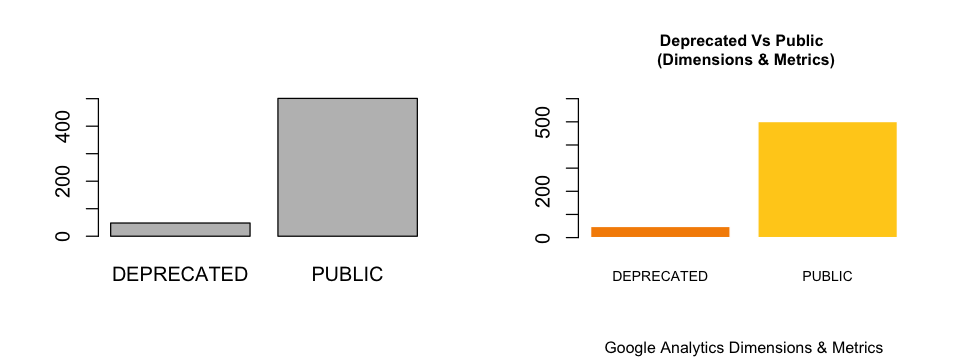

In [46]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,2))
barplot(table(df$attributes.status))
barplot(table(df$attributes.status), main="Deprecated Vs Public \n (Dimensions & Metrics)", sub = "Google Analytics Dimensions & Metrics",  col=c("#F58D00","#FFCE1C"), cex.main=.8, cex.sub=.8, cex.names =.7, border = "white",  ylim=c(0,1.2*max(unlist(table(df$attributes.status)))))

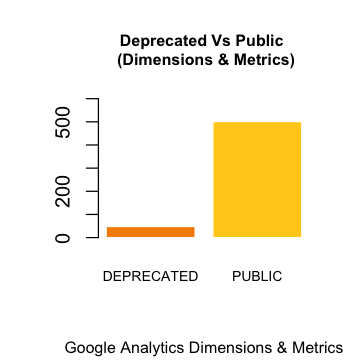

In [41]:
barplot(table(df$attributes.status), main="Deprecated Vs Public \n (Dimensions & Metrics)", sub = "Google Analytics Dimensions & Metrics",  col=c("#F58D00","#FFCE1C"), cex.main=.8, cex.sub=.8, cex.names =.7, border = "white",  ylim=c(0,1.2*max(unlist(table(df$attributes.status)))))